In [ ]:
from google.colab import files

# Upload the dataset (this will prompt you to select a file)
uploaded = files.upload()


Saving twitter_dataset.csv to twitter_dataset.csv


Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

import pandas as pd
from sklearn.model_selection import train_test_split

# Download stopwords if not already available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading dataset

In [ ]:
data = pd.read_csv("twitter_dataset.csv")
data.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


Data Pre-processing

There is text pre-processing which is used for cleaning the tweets in the data. This function would be removing the special characters, URLs, twitter handles, hashtags except the alphabets and spaces. This function would be converting the text into lower case and also removes the extra white spaces. A new column cleaned_text is generated which contains the cleaned version of each tweet.

In [ ]:
# Preprocessing function to clean tweet text
def preprocess_text(text):
    # Remove links, mentions, hashtags, and special characters
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)  # Remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = text.strip()  # Remove leading/trailing whitespaces
    return text

# Apply the preprocessing function to the 'Text' column
data['cleaned_text'] = data['Text'].apply(preprocess_text)

# Display the cleaned text
data[['Text', 'cleaned_text']].head()

,Text,cleaned_text
0,Party least receive say or single. Prevent pre...,party least receive say or single prevent prev...
1,Hotel still Congress may member staff. Media d...,hotel still congress may member staff media dr...
2,Nice be her debate industry that year. Film wh...,nice be her debate industry that year film whe...
3,Laugh explain situation career occur serious. ...,laugh explain situation career occur serious f...
4,Involve sense former often approach government...,involve sense former often approach government...


In [ ]:
data.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,cleaned_text
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51,party least receive say or single prevent prev...
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58,hotel still congress may member staff media dr...
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19,nice be her debate industry that year film whe...
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29,laugh explain situation career occur serious f...
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21,involve sense former often approach government...


Checking null values in data

In [ ]:
data.isnull().sum()

,0
Tweet_ID,0
Username,0
Text,0
Retweets,0
Likes,0
Timestamp,0
cleaned_text,0


Here there is analysis of the twitter data at the user and temporal levels. In order to make data handling simpler, first of all the Timestamp column is converted into datetime format. After that, it generates visualizations, including a bar chart of the Top 10 most active users by number of tweets, a time series line plot that displays the daily amount of tweets over time, and a histogram of Retweets and Likes to display their distributions. These charts aid in comprehending posting trends over time, user activity, and tweet interaction.

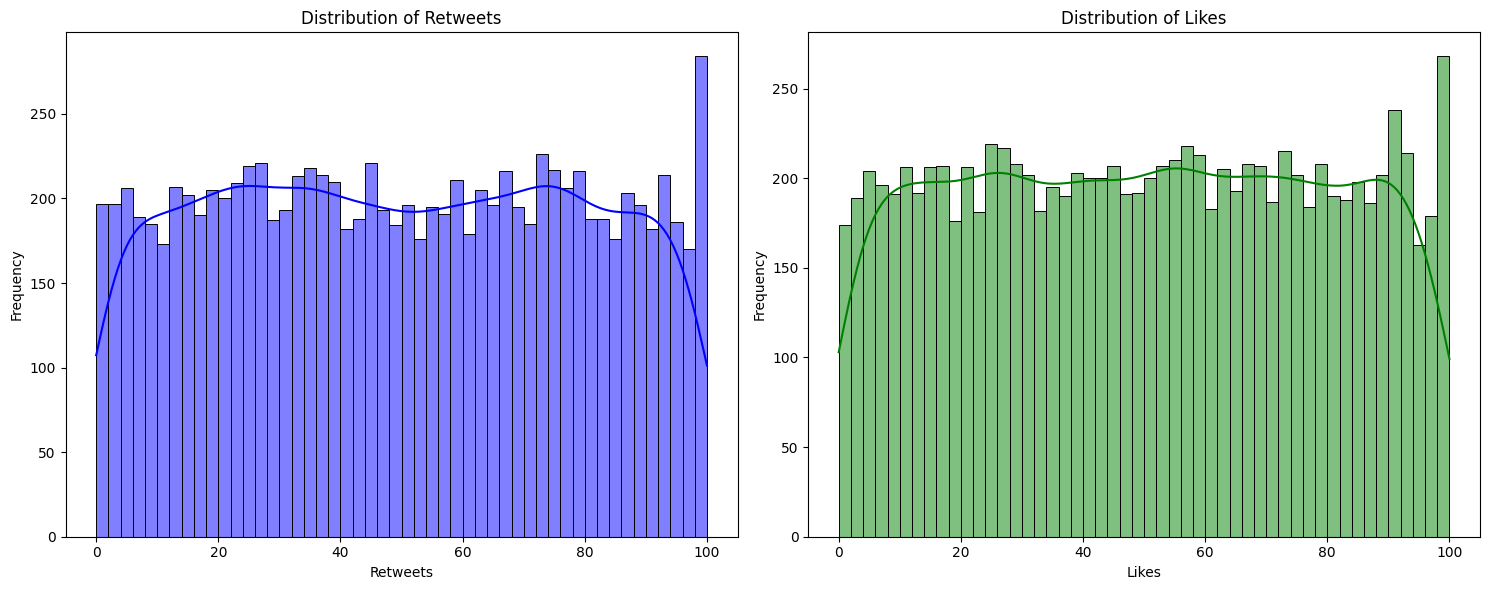

<ipython-input-36-a5f9f09f2e6e>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.index, y=top_users.values, palette="viridis")


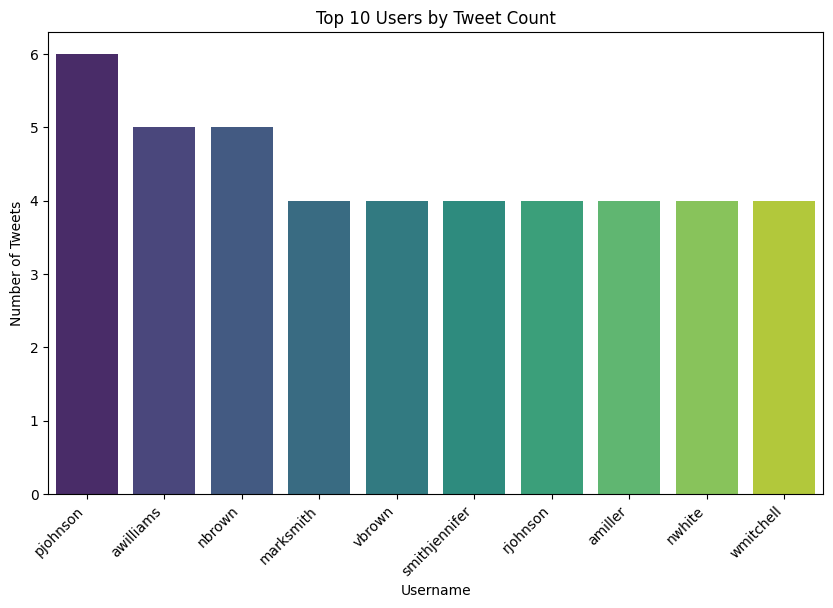

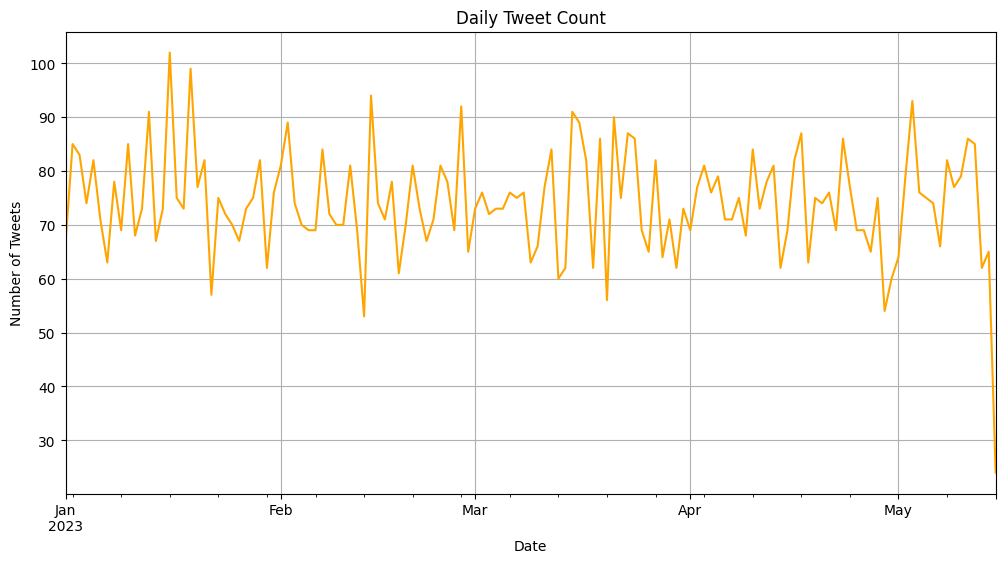

In [ ]:


# Convert 'Timestamp' to datetime for time-based analysis
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Set up the figure and axes for multiple plots
plt.figure(figsize=(15, 6))

# Distribution of Retweets and Likes
plt.subplot(1, 2, 1)
sns.histplot(data['Retweets'], bins=50, kde=True, color='blue')
plt.title('Distribution of Retweets')
plt.xlabel('Retweets')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['Likes'], bins=50, kde=True, color='green')
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Top 10 Users by Tweet Count
top_users = data['Username'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_users.index, y=top_users.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Users by Tweet Count')
plt.xlabel('Username')
plt.ylabel('Number of Tweets')
plt.show()

# Time trend of tweets
plt.figure(figsize=(12, 6))
data.set_index('Timestamp').resample('D').count()['Tweet_ID'].plot(color='orange')
plt.title('Daily Tweet Count')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()


In [ ]:
#!pip install transformers datasets torch scikit-learn


In [ ]:
data.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,cleaned_text
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51,party least receive say or single prevent prev...
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58,hotel still congress may member staff media dr...
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19,nice be her debate industry that year film whe...
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29,laugh explain situation career occur serious f...
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21,involve sense former often approach government...


In [ ]:
#!pip install transformers torch


In the next step, a new column named 'Sentiments' is being created which would be used for assigning appropiate sentiments to the text column. On the basis of the positive, negative or neutral key words, the sentiments are assigned.

In [ ]:
def assign_sentiment(text):
    text = text.lower()  # Convert to lowercase

    positive_words = ["good", "great", "amazing", "love", "happy", "nice"]
    negative_words = ["bad", "terrible", "awful", "hate", "sad", "worst"]

    if any(word in text for word in positive_words):
        return "Positive"
    elif any(word in text for word in negative_words):
        return "Negative"
    else:
        return "Neutral"

data["Sentiment"] = data["cleaned_text"].apply(assign_sentiment)
data.head()


,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,cleaned_text,Sentiment
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51,party least receive say or single prevent prev...,Neutral
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58,hotel still congress may member staff media dr...,Neutral
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19,nice be her debate industry that year film whe...,Positive
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29,laugh explain situation career occur serious f...,Neutral
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21,involve sense former often approach government...,Neutral


Sentiment distribution plot

<ipython-input-42-b241c94fd680>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


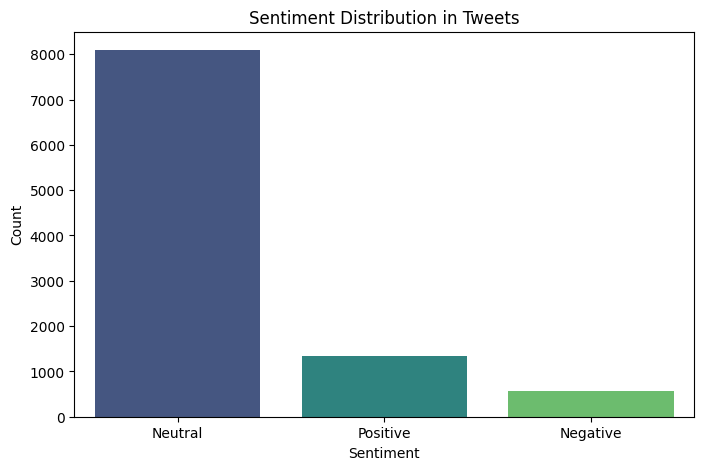

In [ ]:


# Count occurrences of each sentiment
sentiment_counts = data["Sentiment"].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Add labels
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution in Tweets")

# Show the plot
plt.show()


In the next step there is the use of a Transformer-based architecture which is influenced by LLaMA to create and train a sentiment classification model for tweets. It has unique implementations of important Transformer elements like as feed-forward layers, multi-head attention, and positional encoding.

Here the Tweets are converted into input IDs and tokenized using BERT's tokenizer. Every tweet is categorized by the model as having a favorable, negative, or neutral emotion. The original LLaMA backbone is replaced with a pretrained BERT model, and then a linear layer is utilized for classification.

Cross-entropy loss and the AdamW optimizer are used to train the model, and accuracy is assessed at the end of each epoch.

In [ ]:


# Define Model Hyperparameters
VOCAB_SIZE = 50000  # Number of tokens in vocabulary
EMBED_DIM = 512  # Size of word embeddings
NUM_HEADS = 8  # Number of attention heads
HIDDEN_DIM = 2048  # Size of feed-forward network
NUM_LAYERS = 6  # Number of Transformer blocks
SEQ_LEN = 128  # Maximum sequence length

# Positional Encoding
class PositionalEncoding(nn.Module):
    def __init__(self, embed_dim, max_len=512):
        super().__init__()
        pe = torch.zeros(max_len, embed_dim)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_dim, 2).float() * (-torch.log(torch.tensor(10000.0)) / embed_dim))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.pe = pe.unsqueeze(0)

    def forward(self, x):
        return x + self.pe[:, :x.size(1), :].to(x.device)

# Multi-Head Attention
class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads
        self.qkv = nn.Linear(embed_dim, embed_dim * 3)
        self.fc_out = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        B, T, C = x.shape
        qkv = self.qkv(x).reshape(B, T, 3, self.num_heads, self.head_dim)
        q, k, v = qkv.permute(2, 0, 3, 1, 4)  # Separate q, k, v
        scores = (q @ k.transpose(-2, -1)) / (self.head_dim ** 0.5)
        attn = F.softmax(scores, dim=-1)
        out = (attn @ v).transpose(1, 2).reshape(B, T, C)
        return self.fc_out(out)

# Feed Forward Network
class FeedForward(nn.Module):
    def __init__(self, embed_dim, hidden_dim):
        super().__init__()
        self.fc1 = nn.Linear(embed_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, embed_dim)

    def forward(self, x):
        return self.fc2(F.gelu(self.fc1(x)))

# Transformer Block
class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, hidden_dim):
        super().__init__()
        self.attn = MultiHeadAttention(embed_dim, num_heads)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.ff = FeedForward(embed_dim, hidden_dim)
        self.norm2 = nn.LayerNorm(embed_dim)

    def forward(self, x):
        x = self.norm1(x + self.attn(x))  # Add & Norm
        x = self.norm2(x + self.ff(x))  # Add & Norm
        return x

# LLaMA-like Model
class LlamaModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_heads, hidden_dim, num_layers, seq_len):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.pos_enc = PositionalEncoding(embed_dim, seq_len)
        self.layers = nn.ModuleList([TransformerBlock(embed_dim, num_heads, hidden_dim) for _ in range(num_layers)])
        self.norm = nn.LayerNorm(embed_dim)
        self.fc_out = nn.Linear(embed_dim, vocab_size)

    def forward(self, x):
        x = self.embed(x)
        x = self.pos_enc(x)
        for layer in self.layers:
            x = layer(x)
        x = self.norm(x)
        return self.fc_out(x)

# Load Tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")  # Replace with actual LLaMA model's tokenizer

# Define dataset class
class TweetDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts.iloc[idx],
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt",
        )
        return encoding["input_ids"].squeeze(0), torch.tensor(self.labels.iloc[idx])

# Encode labels
label_encoder = LabelEncoder()
data["Sentiment"] = label_encoder.fit_transform(data["Sentiment"])

# Train-test split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data["cleaned_text"], data["Sentiment"], test_size=0.2, random_state=42
)

# Create datasets
train_dataset = TweetDataset(train_texts, train_labels, tokenizer)
val_dataset = TweetDataset(val_texts, val_labels, tokenizer)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# Define LLaMA Model for Classification
class LLaMAForClassification(nn.Module):
    def __init__(self, llama_model, num_classes=3):
        super().__init__()
        self.llama = llama_model  # LLaMA base model
        self.classifier = nn.Linear(self.llama.config.hidden_size, num_classes)

    def forward(self, input_ids):
        outputs = self.llama(input_ids).last_hidden_state
        logits = self.classifier(outputs[:, 0, :])  # Use CLS token output
        return logits

# Initialize LLaMA Model (Replace with actual LLaMA model)
llama_model = AutoModel.from_pretrained("bert-base-uncased")  # Replace with actual LLaMA model
model = LLaMAForClassification(llama_model, num_classes=3).to("cuda")

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=5e-5)

# Training Function
def train_model(model, train_loader, val_loader, epochs=5):
    for epoch in range(epochs):
        model.train()
        for input_ids, labels in train_loader:
            input_ids, labels = input_ids.to("cuda"), labels.to("cuda")
            optimizer.zero_grad()
            logits = model(input_ids)
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        preds, true_labels = [], []
        with torch.no_grad():
            for input_ids, labels in val_loader:
                input_ids, labels = input_ids.to("cuda"), labels.to("cuda")
                logits = model(input_ids)
                preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
                true_labels.extend(labels.cpu().numpy())

        acc = accuracy_score(true_labels, preds)
        print(f"Epoch {epoch + 1}, Accuracy: {acc:.4f}")

# Train & Evaluate the model
train_model(model, train_loader, val_loader, epochs=5)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Epoch 1, Accuracy: 1.0000
Epoch 2, Accuracy: 1.0000
Epoch 3, Accuracy: 1.0000
Epoch 4, Accuracy: 1.0000
Epoch 5, Accuracy: 1.0000


The next step evaluates the trained sentiment classification model on the  test dataset. It prepares the test data using the same tokenization and DataLoader as used during training. The model is set to evaluation mode to disable dropout and other training-specific layers. Using torch.no_grad() to reduce memory usage and improve speed, it predicts sentiment labels for each tweet. Predictions are compared to the true labels using accuracy_score, and the final test accuracy is printed to assess the model's overall performance on unseen data.

In [ ]:

test_texts = data["cleaned_text"]
test_labels = data["Sentiment"]
test_dataset = TweetDataset(test_texts, test_labels, tokenizer)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

model.eval()
preds, true_labels = [], []
with torch.no_grad():
    for input_ids, labels in test_loader:
        input_ids, labels = input_ids.to("cuda"), labels.to("cuda")
        logits = model(input_ids)
        preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

acc = accuracy_score(true_labels, preds)
print(f"Test Accuracy: {acc:.4f}")


Test Accuracy: 1.0000


In [ ]:
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)


In [ ]:
# Save the model
torch.save(model.state_dict(), 'llama_model.pth')

# Load the model
model.load_state_dict(torch.load('llama_model.pth'))
model.eval()


LLaMAForClassification(
  (llama): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, e

In [ ]:
def predict(texts):
    model.eval()
    inputs = tokenizer(texts, padding=True, truncation=True, max_length=SEQ_LEN, return_tensors="pt")
    input_ids = inputs["input_ids"].to("cuda")
    with torch.no_grad():
        logits = model(input_ids)
        predictions = torch.argmax(logits, dim=1).cpu().numpy()
    return predictions

new_texts = ["I love this product!", "This is a terrible experience."]
predictions = predict(new_texts)
print(predictions)


[1 0]


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

precision, recall, f1, _ = precision_recall_fscore_support(true_labels, preds, average='weighted')
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

cm = confusion_matrix(true_labels, preds)
print("Confusion Matrix:")
print(cm)


Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Confusion Matrix:
[[ 572    0    0]
 [   0 8093    0]
 [   0    0 1335]]


In [ ]:
#pip install streamlit transformers
